In [1]:
import time

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
import random
import tabulate

In [2]:
import sys

print(sys.version)

3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]


In [3]:
import tensorflow as tf

print(tf.__version__)

2.14.0


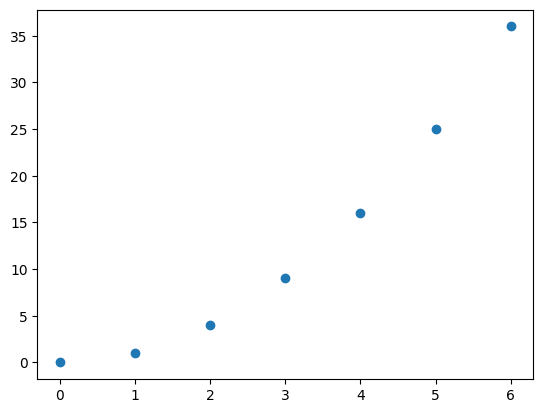

In [4]:
import matplotlib.pyplot as plt
import numpy as np

figure = plt.figure()
axes = figure.add_subplot()

x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([0, 1, 4, 9, 16, 25, 36])

axes.scatter(x, y)

In [5]:
def get_datos():
    iris = load_iris()

    sepal_length = iris.data[0:99, 0]
    petal_length = iris.data[0:99, 2]
    flower_type = iris.target[0:99]

    x = np.column_stack((sepal_length, petal_length))
    y = flower_type

    return x, y

In [6]:
def compile_fit(layers_epochs, model_x, model_y):
    tf.keras.utils.set_random_seed(5)

    layers = layers_epochs[0]
    epochs = layers_epochs[1]

    model = Sequential()

    number_of_columns = len(model_x[0])

    for idx, layer in enumerate(layers):
        if idx == 0:
            model.add(Dense(layer, activation='relu', input_dim=number_of_columns))
        elif idx == (len(layers) - 1):
            model.add(Dense(layer, activation='sigmoid'))
        else:
            model.add(Dense(layer, activation='relu'))

    model.compile(loss='mean_squared_error')

    timestamp_before = time.time_ns()
    model.fit(model_x, model_y, epochs=epochs)
    timestamp_after = time.time_ns()

    return {
        "model": model,
        "elapsed_time": (timestamp_after - timestamp_before) / 1_000_000_000
    }

In [7]:
x, y = get_datos()

In [8]:
results = []

neuronal_nets = [[[2, 4, 1], 30], [[4, 8, 8, 2, 1], 34], [[8, 12, 24, 12, 1], 32], [[8, 16, 8, 1], 28],
                 [[16, 32, 1], 20]]
for net in neuronal_nets:
    model_performance = compile_fit(net, x, y)
    model = model_performance["model"]
    time_taken = model_performance["elapsed_time"]

    prediction_result = model.predict([[4.9, 1.4], [6.3, 4.9]])

    indexed_result = [(','.join(map(str, net[0]))), net[1], prediction_result[0][0], prediction_result[1][0],
                      round(time_taken, 2)]

    results.append(indexed_result)

Epoch 1/30
4/4 [==============================] - 0s 0s/step - loss: 0.4819
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4779
Epoch 3/30
4/4 [==============================] - 0s 2ms/step - loss: 0.4744
Epoch 4/30
4/4 [==============================] - 0s 714us/step - loss: 0.4711
Epoch 5/30
4/4 [==============================] - 0s 668us/step - loss: 0.4677
Epoch 6/30
4/4 [==============================] - 0s 2ms/step - loss: 0.4639
Epoch 7/30
4/4 [==============================] - 0s 1ms/step - loss: 0.4589
Epoch 8/30
4/4 [==============================] - 0s 502us/step - loss: 0.4545
Epoch 9/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4487
Epoch 10/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4425
Epoch 11/30
4/4 [==============================] - 0s 1ms/step - loss: 0.4373
Epoch 12/30
4/4 [==============================] - 0s 2ms/step - loss: 0.4315
Epoch 13/30
4/4 [==============================] - 0s 1ms/step - los

In [9]:
print(tabulate.tabulate(results, headers=["Red", "Epocas", "Result 1", "Result 2", "Tiempo (s)"]))

Red             Epocas    Result 1    Result 2    Tiempo (s)
------------  --------  ----------  ----------  ------------
2,4,1               30   0.377323     0.286696          0.52
4,8,8,2,1           34   0.50323      0.50323           0.57
8,12,24,12,1        32   0.0436002    0.998265          0.59
8,16,8,1            28   0.265955     0.819212          0.53
16,32,1             20   0.109        0.947204          0.41
